# Примеры лабораторной работы

### Задание 5.1

Для трех значений порога 70 + №, 140 + №, 210 + №, где № – номер по списку группы (21), провести пороговую обработку полутонового изображения с плавным изменением интенсивности.

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [43]:
img = cv2.imread ('Img/img.jpg')
img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)

In [44]:
ret, thresh1 = cv2.threshold (img, 91,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold (img, 91,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold (img, 91,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold (img, 91,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold (img, 91,255, cv2.THRESH_TOZERO_INV)

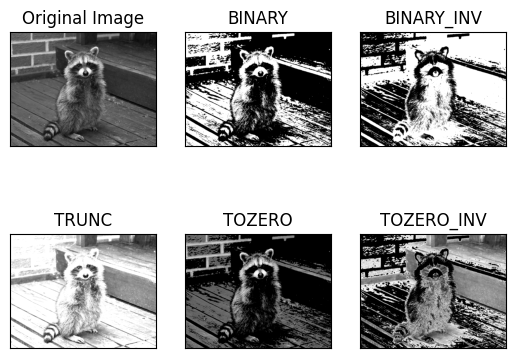

In [45]:
title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show();

### Задание 5.2.

Протестировать функции с адаптивным порогом, задавая последовательно два начения порога, примерно 1/3 и 2/3 от максимума интенсивности. Проанализировать результат пороговой обработки изображения.


In [11]:
img = cv2.imread('Img/img.jpg',0)
img = cv2.medianBlur(img,5)

In [12]:
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

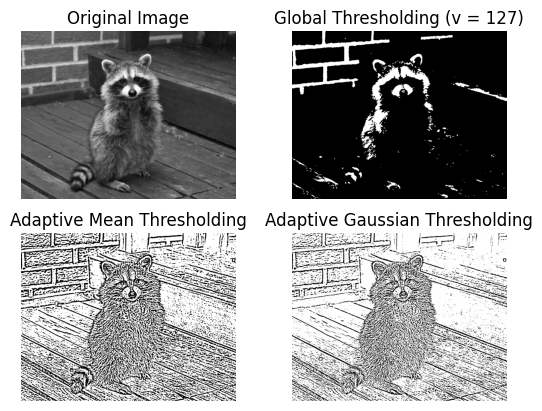

In [13]:
title = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.axis('off')
plt.show();

### Задание 5.3

Загрузить модули cv2, random, PIL. Создать зашумленное изображение.

In [30]:
import random
from PIL import Image, ImageDraw

In [31]:
image = Image.open('Img/img.jpg')
draw = ImageDraw.Draw(image) # Создаем инструмент для рисования

In [32]:
width = image.size[0] # Определяем ширину
height = image.size[1] # Определяем высоту
pix = image.load() # Выгружаем значения пикселей

In [37]:
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 200)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

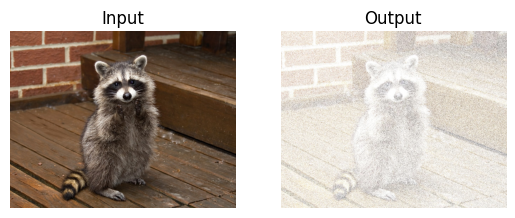

In [38]:
image.save("median.png", "JPEG") # сохранить изображение

imag = cv2.imread('Img/img.jpg')
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
img = cv2.imread('Img/median.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imag),plt.title('Input')
plt.axis('off')
plt.subplot(122),plt.imshow(img),plt.title('Output')
plt.axis('off')
plt.show();

### Задание 5.4

На вход программы пороговой обработки подается зашумленное изображение. Это изображение обрабатывается тремя способами. В первом случае используется глобальный порог со значением 127. Во втором случае напрямую применяется порог Оцу. В третьем случае изображение сначала удаляет шум фильтром с гауссовым ядром 5x5, затем применяется пороговая обработка Оцу. Сделать анализ того, как фильтрация шума улучшает результат.

In [91]:
img = cv2.imread('Img/img.jpg', 0)

In [92]:
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # Глобальная обработка
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Обработка Otsu
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Обработка Otsu’s после фильтра Гаусса

In [93]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ["Original Noisy Image","Histogram","GlobalThresholding (v=127)","Original Noisy Image", "Histogram",
          "Otsu’s Thresholding","Gaussian filtered Image","Histogram","Otsu’s Thresh-olding"]

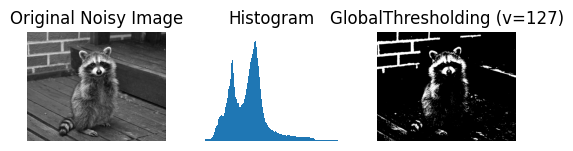

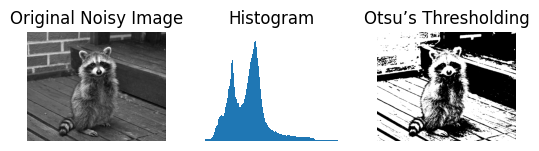

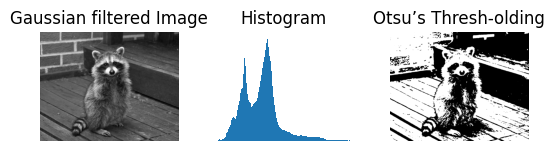

In [94]:
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3], "gray")
    plt.title(titles[i*3])
    plt.axis('off')
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1])
    plt.axis('off')
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],"gray")
    plt.title(titles[i*3+2])
    plt.axis('off')
    plt.show()